# Python Part 3:  Pandas

## Data Source
#### Description:  200K+Jeopardy questions
#### Source: [reddit](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/)
---


## Part 1:  read in libraries, check versions, set up preferences

In [34]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [35]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [36]:
# check version of libraries
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.19.2
Numpy version: 1.11.3


In [37]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [38]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [39]:
# check size of file; notice this is a bash command -- I can run it in the notebook!
!ls -lt

total 4576
-rw-r--r--  1 reshamashaikh  staff   326757 Feb 18 14:38 pandas_jeopardy_v3.ipynb
-rw-r--r--  1 reshamashaikh  staff   325256 Feb 18 14:10 pandas_jeopardy_v2.ipynb
drwxr-xr-x  6 reshamashaikh  staff      204 Feb 18 12:55 archive
-rw-r--r--@ 1 reshamashaikh  staff  1651525 Feb 18 12:01 jeopardy.csv
-rw-r-----@ 1 reshamashaikh  staff    28995 May 13  2015 olive.csv


## Part 2:  read in the data

In [40]:
# read csv data into pandas dataframe
df_orig = pd.read_csv('jeopardy.csv', encoding="ISO-8859-1")

# Note: I normally don't need to specify encoding.  
# But, when I read in this csv file, there was an error.  
# I googled it; there are some different unicode types.  I tried a bunch and this worked.  

# Data formatting is unpredictable, and one of the skills in data science is to 'google' 
# and see how to work through data issues

## Part 3:  look at data
`df` = dataframe being used.  In our case, it is `df_orig`
```python
df.shape()
df.info()
df.head()
df.tail()
df.columns
df.values
df.dtype
```

In [41]:
# check dimensions of dataframe
# (rows, colums)
df_orig.shape

(10999, 7)

In [42]:
df_orig.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona


## Part 4:  summarize data
```python
df.describe()
```

In [43]:
df_orig.describe()

,Show Number
count,10999.000
mean,4308.181
std,1397.758
min,62.000
25%,3409.000
50%,4541.000
75%,5431.000
max,6294.000


In [44]:
df_orig['Round'].describe()

count         10999
unique            3
top       Jeopardy!
freq           5434
Name: Round, dtype: object

In [45]:
df_orig['Round'].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!'], dtype=object)

In [46]:
df_orig.groupby('Round').count()

,Show Number,Air Date,Category,Value,Question,Answer
Round,,,,,,
Double Jeopardy!,5382,5382,5382,5382,5382,5382
Final Jeopardy!,183,183,183,183,183,183
Jeopardy!,5434,5434,5434,5434,5434,5434


## Part 5:  create a new column

In [ ]:
df_orig['Dollar_Amt'] = df_orig['Value']

## Part 5:  clean data

In [51]:
# remove the '$' in the column Dollar_Amt
df_orig['Dollar_Amt'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')

df_orig.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200


In [52]:
# let's look at the tail end of the data
df_orig.tail(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
10994,4362,7/15/03,Double Jeopardy!,BEFORE & AFTER,"$1,200","Liberator & king of Scotland who starred in ""D...",Robert the Bruce Willis,"1,200"
10995,4362,7/15/03,Double Jeopardy!,PEN NAMES,"$2,000","This pseudonym means ""2 fathoms deep""",Mark Twain,"2,000"
10996,4362,7/15/03,Double Jeopardy!,TELEVISION,"$1,600","She's the ""Night Court"" actress seen here",Markie Post,"1,600"
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher,"1,600"
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz,"1,600"


In [55]:
# we need to do more cleaning.  There is a comma in the dollar amount
# remove the commas in the column 'Dollar_Amt'
# there are many ways to do it.  here's one:
df_orig['Dollar_Amt'] = df_orig['Dollar_Amt'].str.replace(',', '')
df_orig.tail(2)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher,1600
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz,1600


In [60]:
# check data types
df_orig.dtypes

Show Number     int64
Air Date       object
Round          object
Category       object
Value          object
Question       object
Answer         object
Dollar_Amt     object
dtype: object

In [68]:
# we removed the commas from 'Dollar_Amt' but it is still an object;  convert it to a number
df['Dollar_Amt'] = pd.to_numeric

In [69]:
# check data types
df_orig.dtypes

Show Number      int64
Air Date        object
Round           object
Category        object
Value           object
Question        object
Answer          object
Dollar_Amt     float64
dtype: object

In [72]:
mean_dollar_amt = df_orig['Dollar_Amt'].mean()
print(mean_dollar_amt)

761.000924556213


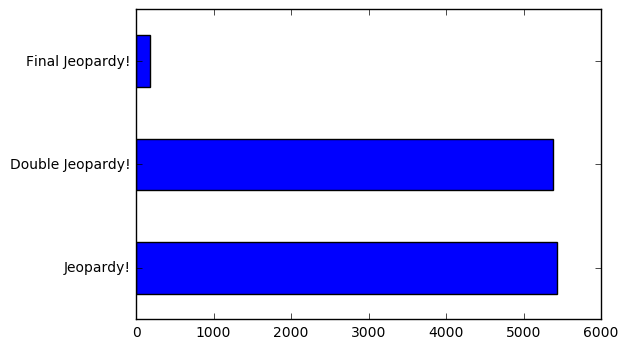

In [54]:
# do barplot of a categorical variable
df_orig['Round'].value_counts().plot('barh')

---

# Exercises

---

## Q1:  Read in the libraries you need

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q1:  Set options in pandas so it displays `max_rows` to 10

In [3]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q2:  What versions of `Python` and `pandas` are you running?  



In [4]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.19.2
Numpy version: 1.11.3


In [5]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


## Q3:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [6]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv')

## Q4:  How many rows and columns are in this dataframe?

In [7]:
df.shape

(572, 11)

## Q5:  Print the first 4 rows of the data

In [8]:
df.head(4)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35


In [9]:
#df.groupby('region').count()

In [10]:
#df.groupby('area').count()

## Q6:  How many different data types are in this dataframe, and what are the data types?

In [11]:
# this gives the Columns, Types, Rows and the memory used by the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 11 columns):
Unnamed: 0     572 non-null object
region         572 non-null int64
area           572 non-null int64
palmitic       572 non-null int64
palmitoleic    572 non-null int64
stearic        572 non-null int64
oleic          572 non-null int64
linoleic       572 non-null int64
linolenic      572 non-null int64
arachidic      572 non-null int64
eicosenoic     572 non-null int64
dtypes: int64(10), object(1)
memory usage: 49.2+ KB


## Q7:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [14]:
# copy a column into a new column
df['sub_region_raw'] = df['Unnamed: 0']

## Q5:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [15]:
# replace a column name
df.rename(columns = {'Unnamed: 0' : 'sub_region_desc'}, inplace = True)
df.head()

,sub_region_desc,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia


## Q5:  Rename the column 'region' to:  'sub_region'

In [16]:
# replace a column name
df.rename(columns = {'area' : 'sub_region'}, inplace = True)
df.head()

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia


## Q6:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [17]:
df.groupby('region').count()

,sub_region_desc,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
region,,,,,,,,,,,
1,323,323,323,323,323,323,323,323,323,323,323
2,98,98,98,98,98,98,98,98,98,98,98
3,151,151,151,151,151,151,151,151,151,151,151


## Q6:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [18]:
df.groupby('sub_region').count()

,sub_region_desc,region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
sub_region,,,,,,,,,,,
1,25,25,25,25,25,25,25,25,25,25,25
2,56,56,56,56,56,56,56,56,56,56,56
3,206,206,206,206,206,206,206,206,206,206,206
4,36,36,36,36,36,36,36,36,36,36,36
5,65,65,65,65,65,65,65,65,65,65,65
6,33,33,33,33,33,33,33,33,33,33,33
7,50,50,50,50,50,50,50,50,50,50,50
8,50,50,50,50,50,50,50,50,50,50,50
9,51,51,51,51,51,51,51,51,51,51,51


## Q6:  How many unique values of 'sub_region_desc' are there?

In [19]:
df.groupby('sub_region_desc').count()

,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
sub_region_desc,,,,,,,,,,,
1.North-Apulia,1,1,1,1,1,1,1,1,1,1,1
10.North-Apulia,1,1,1,1,1,1,1,1,1,1,1
100.South-Apulia,1,1,1,1,1,1,1,1,1,1,1
101.South-Apulia,1,1,1,1,1,1,1,1,1,1,1
102.South-Apulia,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95.South-Apulia,1,1,1,1,1,1,1,1,1,1,1
96.South-Apulia,1,1,1,1,1,1,1,1,1,1,1
97.South-Apulia,1,1,1,1,1,1,1,1,1,1,1


## Q7:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
region_raw 										
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

### Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [20]:
df['sub_region_desc'].replace(regex=True,inplace=True,to_replace=r'[\.]',value=r'')

In [21]:
df.head()

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
0,1North-Apulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia
1,2North-Apulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia
2,3North-Apulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia
3,4North-Apulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia
4,5North-Apulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia


In [22]:
df['sub_region_desc'].replace(regex=True,inplace=True,to_replace=r'\W',value=r'')

In [23]:
df.head()

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
0,1NorthApulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia
1,2NorthApulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia
2,3NorthApulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia
3,4NorthApulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia
4,5NorthApulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia


In [24]:
df['sub_region_desc'].replace(regex=True,inplace=True,to_replace=r'[\d]+',value=r'')

In [25]:
df.head()

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
0,NorthApulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia
1,NorthApulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia
2,NorthApulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia
3,NorthApulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia
4,NorthApulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia


## Q8:  Try again:  How many unique values of 'sub_region_desc' are there?

#### Hint:  you should see 9 of them!

In [29]:
df.head(4)

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
0,NorthApulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia
1,NorthApulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia
2,NorthApulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia
3,NorthApulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia


In [30]:
df.groupby('sub_region_desc').count()

,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
sub_region_desc,,,,,,,,,,,
Calabria,56,56,56,56,56,56,56,56,56,56,56
CoastSardinia,33,33,33,33,33,33,33,33,33,33,33
EastLiguria,50,50,50,50,50,50,50,50,50,50,50
InlandSardinia,65,65,65,65,65,65,65,65,65,65,65
NorthApulia,25,25,25,25,25,25,25,25,25,25,25
Sicily,36,36,36,36,36,36,36,36,36,36,36
SouthApulia,206,206,206,206,206,206,206,206,206,206,206
Umbria,51,51,51,51,51,51,51,51,51,51,51
WestLiguria,50,50,50,50,50,50,50,50,50,50,50


## Q9:   Create a horizontal frequency barplot for 'region'

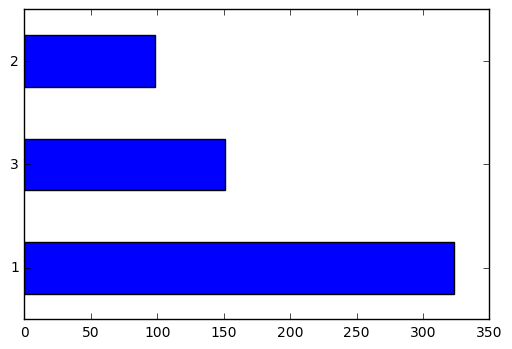

In [31]:
# do barplot of a categorical variable
df['region'].value_counts().plot('barh')

## Q10:   Create a horizontal frequency barplot for 'sub_region'

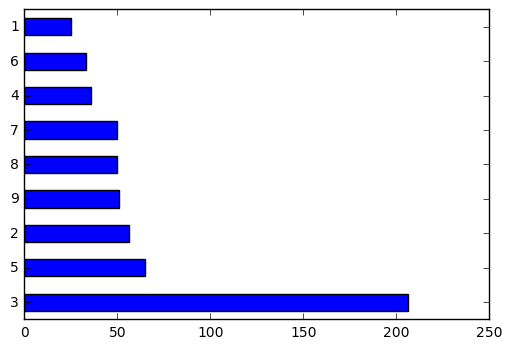

In [32]:
 # do barplot of a categorical variable
df['sub_region'].value_counts().plot('barh')

## Q11:   Create a horizontal frequency barplot for 'sub_region_desc'

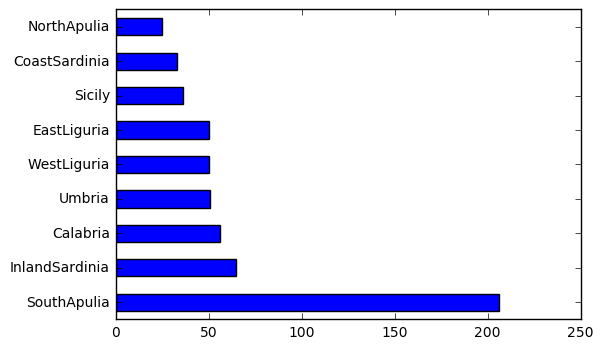

In [33]:
 # do barplot of a categorical variable
df['sub_region_desc'].value_counts().plot('barh')

---

# Bonus Exercises (Optional)

---

# Pandas - To Explore Further
## Things that will be helpful for you in the bootcamp

* dealing with missing data `NaN`, etc.
* `groupby` objects
* applying functions


---

## Bonus Q1:   


## Bonus Q2:   

In [81]:
def func(x):
    if x['Country'] == 'USA':
        return x['x']
    if x['Country'] == 'Canada':
        return x['y']
    return NaN
df['z'] = foo.apply(func(row), axis = 1)


NameError: name 'foo' is not defined

In [87]:
# How the split function works 
x = '1.northapulia'
print "orig:   ", x
y = x.split('.')
print "split:  ", y
z = x.split('.')[-1] #-1 returns the last element of the list
print "return last element of the list:  ", z


orig:    1.northapulia
split:   ['1', 'northapulia']
return last element of the list:   northapulia


In [88]:
olive_oil[['palmitic', 'palmitoleic']].head(5) 
# you can access subset of columns of a data frame. (http://bit.ly/1sPHf1u)

NameError: name 'olive_oil' is not defined

What map did is it took a pandas series in form of a list. Took that list and mapped each value of that list to something. here we are going to use a data frame( set of lists). for data frame you should use apply

In [38]:
list_of_acids =['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
df = olive_oil[list_of_acids].apply(lambda x: x/100.0)
df.head(5)

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [39]:
olive_oil[list_of_acids] =df # we are replacing the acid list values in olive_oil
olive_oil.head(5)
 

,area_Idili,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


(array([   1.,    0.,   11.,   71.,  188.,   79.,  131.,   73.,    9.,    9.]),
 array([  6.1  ,   7.243,   8.386,   9.529,  10.672,  11.815,  12.958,
         14.101,  15.244,  16.387,  17.53 ]),
 <a list of 10 Patch objects>)

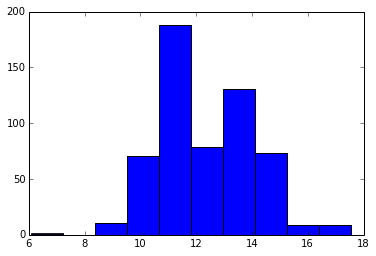

In [40]:
plt.hist(olive_oil.palmitic)

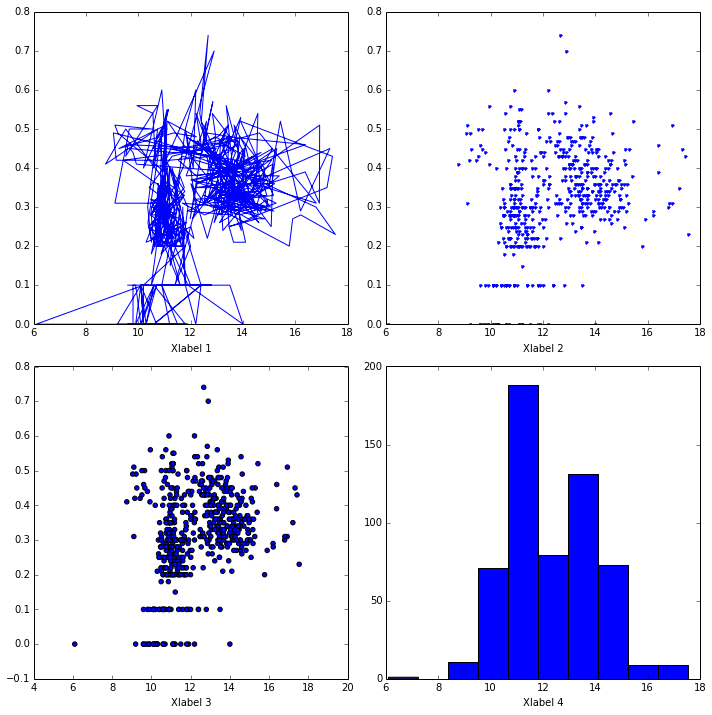

In [46]:
fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(olive_oil.palmitic, olive_oil.linolenic)
axes[0][0].set_xlabel("Xlabel 1")
axes[0][1].plot(olive_oil.palmitic, olive_oil.linolenic, '.')
axes[0][1].set_xlabel("Xlabel 2")
axes[1][0].scatter(olive_oil.palmitic, olive_oil.linolenic)
axes[1][0].set_xlabel("Xlabel 3")
axes[1][1].hist(olive_oil.palmitic)
axes[1][1].set_xlabel("Xlabel 4")

# Loop over the subplots and set the label
#for ax in fig.get_axes():
#    ax.set_xlabel("common X1")
#    ax.set_ylabel("common Y")
#plt.show()

fig.tight_layout()

In [47]:
region_groupby = olive_oil.groupby('region')
grp_reg=region_groupby.describe()
grp_reg.head(20)

arachidic        area  eicosenoic    linoleic   linolenic       oleic    palmitic  palmitoleic     stearic
region                                                                                                                   
1      count  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000   323.000000  323.000000
       mean     0.631176    2.783282    0.273220   10.334985    0.380650   71.000093   13.322879     1.548019    2.287740
       std      0.111644    0.741054    0.083915    2.106730    0.079727    3.451431    1.529349     0.507237    0.398709
       min      0.320000    1.000000    0.100000    4.480000    0.200000   63.000000    8.750000     0.350000    1.520000
       25%      0.560000    2.500000    0.220000    8.555000    0.320000   68.830000   12.680000     1.215000    2.015000
       50%      0.620000    3.000000    0.270000   10.900000    0.370000   70.300000   13.460000     1.630000    2.230000
       75%      0.690000    3.000000    0.320000   12.025000    0.440000   72.835000   14.190000     1.850000    2.495000
       max      1.020000    4.000000    0.580000   14.620000    0.740000   81.130000   17.530000     2.800000    3.750000
2      count   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000    98.000000   98.000000
       mean     0.731735    5.336735    0.019388   11.965306    0.270918   72.680204   11.113469     0.967449    2.261837
       std      0.118826    0.475023    0.007436    1.072336    0.053844    1.418783    0.404111     0.138514    0.176363
       min      0.450000    5.000000    0.010000   10.570000    0.150000   68.820000   10.300000     0.350000    1.990000
       25%      0.660000    5.000000    0.010000   11.122500    0.230000   71.372500   10.852500     0.882500    2.120000
       50%      0.720000    5.000000    0.020000   11.465000    0.270000   73.255000   11.075000     0.960000    2.220000
       75%      0.810000    6.000000    0.020000   13.065000    0.300000   73.810000   11.372500     1.040000    2.395000
       max      1.050000    6.000000    0.030000   14.700000    0.430000   74.390000   12.130000     1.350000    2.720000
3      count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   151.000000  151.000000
       mean     0.375762    8.006623    0.019735    7.270331    0.217881   77.930530   10.948013     0.837351    2.308013
       std      0.293586    0.820542    0.007298    1.431226    0.168865    1.648155    0.825635     0.264388    0.389560
       min      0.000000    7.000000    0.010000    5.100000    0.000000   73.400000    6.100000     0.150000    1.700000

In [48]:
olstd = olive_oil.groupby('region').std()
olstd

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


In [49]:
olmean=region_groupby.aggregate(np.mean)
olmean.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [51]:
renamedict_std={k:k+"_std" for k in list_of_acids}
renamedict_mean={k:k+"_mean" for k in list_of_acids}
olstd.rename(columns=renamedict_std,inplace=True)
olmean.rename(columns=renamedict_mean,inplace=True) 
olstd.head()

,area,palmitic_std,palmitoleic_std,stearic_std,oleic_std,linoleic_std,linolenic_std,arachidic_std,eicosenoic_std
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


In [53]:
olpalmiticmean = olmean[['palmitic_mean']] 
olpalmiticstd = olstd[['palmitic_std']] 
newolbyregion=olpalmiticmean.join(olpalmiticstd)
newolbyregion

,palmitic_mean,palmitic_std
region,,
1,13.322879,1.529349
2,11.113469,0.404111
3,10.948013,0.825635


In [54]:
eico=(olive_oil.eicosenoic < 0.05)
eico

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
557    True
558    True
559    True
560    True
561    True
562    True
563    True
564    True
565    True
566    True
567    True
568    True
569    True
570    True
571    True
Name: eicosenoic, Length: 572, dtype: bool

In [56]:
new_data.dropna()

,Bigdata,Data science,Examiner
0,12,L,0.9
1,34,M,0.8
3,45,c,0.6
